In [1]:
#imports
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from IPython.display import Image

In [2]:
#Constants definition
PATH = "Chemical Composion of Ceramic  edited.csv"
Y_INDEX = 4
NUM_OF_COLUMNS = 17
SUBSET_SIZE = 60
NUM_OF_SUBSETS = 3
RIDGE_LAMBDA = 1e-1
RIDGE_LAMBDA2 = 1e-4
RIDGE_LAMBDA3 = 1e-10
TEST_SIZE = 0.2


In [3]:
#Arguments class
class Args():

    def __init__(self, *args):
        super(Args, self).__init__(*args)
        self.path = PATH
        self.yIndex = Y_INDEX
        self.xIndices = list(range(1, NUM_OF_COLUMNS + 1))
        self.xIndices.remove(self.yIndex)
        self.xIndices = np.array(self.xIndices)
        self.ridgeLamda = RIDGE_LAMBDA
        self.ridgeLamda2 = RIDGE_LAMBDA2
        self.ridgeLamda3 = RIDGE_LAMBDA3
        self.testSize = TEST_SIZE
        self.lassoLamdas = [1e-8, 1e-5, 1e-4,
                            1e-3, 1e-2, 1e-1, 1, 5, 10, 100]

# Dataset

In [18]:
#Dataset pre-processing
class Dataset():
    def __init__(self, *args, **keywords):
        self.data = pd.read_csv(keywords["path"])
        self.columns = self.data._reindex_columns
        data_as_array = self.data.to_numpy()
        self.yIndex = keywords["yIndex"] - 1
        self.xIndices = keywords["xIndices"] - 1
        self.X = data_as_array[:, self.xIndices]
        self.y = data_as_array[:, self.yIndex]
        print(f"Dataset question 3, shape of X & Y:\n{np.ones((len(self.X), 1)).shape, self.X.shape}")
        # create w0 with shape num_of_rows X 1
        w0 = np.ones((len(self.X), 1))
        # Concatenate between w0 and X to matrix of size 88 X 17
        self.X = np.concatenate((w0, self.X), axis=1)
        # create 6 corelated columns as last columns
        self.addedColumns = np.zeros((len(self.X), 6))
        self.addedColumns[:, 0] = self.X[:, 1] + self.X[:, 2]
        self.addedColumns[:, 1] = self.X[:, 3] + self.X[:, 4]
        self.addedColumns[:, 2] = self.X[:, 5] + self.X[:, 6]
        self.addedColumns[:, 3] = self.X[:, 7] + self.X[:, 8]
        self.addedColumns[:, 4] = self.X[:, 9] + self.X[:, 10]
        self.addedColumns[:, 5] = self.X[:, 11] + self.X[:, 12]
        self.X = np.concatenate((self.X, self.addedColumns), axis=1)
        # create 3 subsets of the data
        self.subsets = self.createSubsets(NUM_OF_SUBSETS)
        # split for train and test - lasso
        self.splitTrainAndTest(testSize=keywords["testSize"])
    
    #Subsets creations X^A, X^B, X^C
    def createSubsets(self, numOfSubsets):
        subsets = []
        for i in range(numOfSubsets):
            randomIndices = np.random.randint(
                low=0, high=len(self.X), size=SUBSET_SIZE)
            subsets.append((self.X[randomIndices, :],
                            self.y[randomIndices]))
        print(f"Each Subset shape is: {subsets[1][0].shape}")
        return subsets
    
    #Split into train & Test - Lasso regression step #1
    def splitTrainAndTest(self, testSize=0.2):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=testSize, random_state=42)

In [19]:
args = Args()
dataset = Dataset(path=args.path, xIndices=args.xIndices,yIndex=args.yIndex, testSize=args.testSize)

print(f"Y index is: {dataset.yIndex}")
print(f"X index is: {dataset.xIndices}")
print(f"X shape is: {dataset.X.shape}")

subsets = dataset.subsets



Dataset question 3, shape of X & Y:
((88, 1), (88, 16))
Each Subset shape is: (60, 23)
Y index is: 3
X index is: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16]
X shape is: (88, 23)


# Stability of w

In [80]:
class Regression():
    def __init__(self, X: np.array, y: np.array, Wx=""):
        self.X = X
        self.y = y
        self.Wx = Wx
        self.calculateCoefficients(Wx)

    def calculateCoefficients(self, Wx=""):
        X_transpose = np.transpose(self.X)
        XtX = np.matmul(X_transpose, self.X)
        self.w = np.matmul(np.matmul(np.linalg.inv(XtX), X_transpose), self.y)
        print(f"The shape of {Wx} is:{self.w.shape}")
        print(f"The coeficients of {Wx} are:\n{self.w}\n")
        
def plotFigrueOfRegressionCoefficients(wA, wB, wC, titleAddition=""):
    x = range(2, 24)
    distA_B = np.linalg.norm(wA-wB)
    distA_C = np.linalg.norm(wA-wC)
    distB_C = np.linalg.norm(wB-wC)
    print(
        f"The distance between wA and wB is {distA_B}\n The distance between wA and wC is {distA_C}\n The distance between wB and wC is {distB_C}\n")
    plt.plot(x, wA[1:], color='red', linestyle='--')
    plt.plot(x, wB[1:], color='blue', linestyle='--')
    plt.plot(x, wC[1:], color='green', linestyle='--')
    plt.xlabel("Index of coefficeint(wi")
    plt.ylabel("Coefficeint size in log scale")
    plt.title("Coefficeints stability for different datasets "+titleAddition)

    plt.show()


The shape of Wa is:(23,)
The coeficients of Wa are:
[ 1.11895958e+03 -1.34016149e+03 -2.05396033e+03 -9.30933765e+01
  1.21479174e+02 -3.44926483e+01  1.77775000e+03  3.08021648e+01
 -7.86839962e-03 -6.61947350e+00 -8.12467445e+00 -1.65092987e+00
 -1.78443335e+00 -7.57933058e-07 -2.34093815e-04  6.46660702e-05
  1.05454342e-05  7.06286865e+02  3.78150326e+01  5.77584848e+01
 -2.23905330e-01  7.63857056e+00  1.91505869e+00]

The shape of Wb is:(23,)
The coeficients of Wb are:
[ 6.77440318e+02  1.07477288e+03  9.07368239e+02 -7.14740884e+01
 -1.82301156e+02 -5.87012043e+01  7.16002933e+02 -1.23862251e+02
 -1.59350788e+00 -1.20254856e+01 -1.19714397e+01  9.79525096e-01
  1.11075495e+00 -3.33392381e-05  1.02205650e-04  1.63522909e-05
 -3.48143743e-05 -8.27573683e+02  7.21275954e+01  3.61770715e+01
  1.61248504e+00  1.23012841e+01 -1.06802546e+00]

The shape of Wc is:(23,)
The coeficients of Wc are:
[-8.71358953e+02 -2.04933951e+03 -1.24324340e+03  2.15150397e+02
 -2.55421201e+02  1.8575082

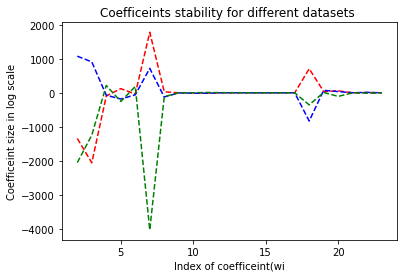

In [81]:
#Compute Wa, Wb & Wc coeficients
basicRegressionA = Regression(subsets[0][0], subsets[0][1], "Wa")
basicRegressionB = Regression(subsets[1][0], subsets[1][1], "Wb")
basicRegressionC = Regression(subsets[2][0], subsets[2][1], "Wc")
#print(basicRegressionA.w, basicRegressionB.w, basicRegressionC.w)
plotFigrueOfRegressionCoefficients(basicRegressionA.w, basicRegressionB.w, basicRegressionC.w)

### We see for different runs most of the Wx values are very low and we have some coeficients that are very large (10^3, -1.7*10^3) ==> those coeficients are large and unstable. As we learned this may be cause problems in inverting the (X^T * X) matrix (close to singular). This may be caused due to the corelation exisit between the different data features.

# Ridge Regresion

In [95]:
class RidgeRegression(Regression):
    def __init__(self, X: np.array, y: np.array, lamda: float, Wx=""):
        self.lamda = lamda
        self.Wx=Wx
        super(RidgeRegression, self).__init__(X, y, Wx)

    def calculateCoefficients(self, Wx=""):
        X_transpose = np.transpose(self.X)
        XtX = np.matmul(X_transpose, self.X)
        regularizationTerm = self.lamda * np.eye(len(XtX))
        XtX += regularizationTerm
        self.w = np.matmul(np.matmul(np.linalg.inv(XtX), X_transpose), self.y)
        print(f"The shape of {Wx} is:{self.w.shape}")
        print(f"The coeficients of {Wx} are:\n{self.w}\n")

Ridge regression with lambda=0.1
The shape of wA is:(23,)
The coeficients of wA are:
[ 5.49335156e+01  2.06963587e+00 -2.47950010e+00 -4.31047539e-01
  3.48815122e-01 -6.61205870e-01  4.93471237e-01 -3.63274183e-01
  1.80764794e-01  2.51196675e-02  7.06946084e-03 -2.59188981e-02
  4.00142835e-02  1.30248652e-02 -3.58586012e-02  1.61460420e-02
  5.65534480e-03 -4.09837794e-01 -8.22331902e-02 -1.67737573e-01
 -1.82509260e-01  3.21891332e-02  1.40953765e-02]

The shape of wB is:(23,)
The coeficients of wB are:
[ 5.45802703e+01  4.42912681e+00 -8.40884295e+00  5.48288485e-01
 -7.55601570e-01 -2.88538906e+00  5.41360735e+00 -9.06240561e-01
  4.53574749e-01 -2.86827786e-02  4.47388322e-02 -4.18334354e-02
  4.82919904e-02  1.26467054e-02 -1.00123268e-01 -7.24043137e-03
  5.91637259e-03 -3.97970449e+00 -2.07315144e-01  2.52823571e+00
 -4.52669357e-01  1.60560468e-02  6.45856540e-03]

The shape of wC is:(23,)
The coeficients of wC are:
[ 5.49310721e+01  9.10611194e-01  4.36748810e-02 -2.7274966

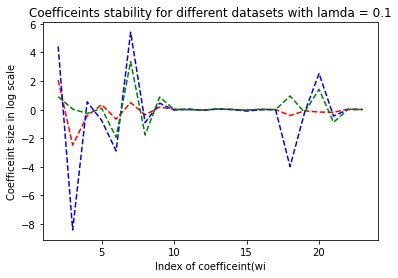

Ridge regression with lambda=0.0001
The shape of wA is:(23,)
The coeficients of wA are:
[ 9.88766185e+01 -3.16668567e-01 -3.23283397e-01 -3.34309819e-01
 -3.30604316e-01 -3.16298692e-01 -4.06255352e-01 -6.67910471e-01
  3.33528548e-01  7.00670382e-06  2.34772417e-05 -1.10145145e-04
  1.19472913e-04  2.25842882e-05 -2.96077175e-04  9.29688353e-05
  2.07106583e-05 -6.69634406e-01 -6.63075181e-01 -6.83483907e-01
 -3.33533509e-01  4.45821908e-05 -5.45091782e-06]

The shape of wB is:(23,)
The coeficients of wB are:
[ 9.89533441e+01 -3.35232287e-01 -3.01118901e-01 -3.33963597e-01
 -3.35108003e-01 -2.85167208e-01 -4.02896759e-01 -6.57984959e-01
  3.26182232e-01 -9.23528723e-06  8.08701930e-05 -3.09913852e-05
  5.05660244e-05 -5.42509586e-06 -6.47107808e-05 -2.94251804e-05
 -2.30492274e-05 -6.68004563e-01 -6.66123866e-01 -7.09648166e-01
 -3.26200071e-01  6.39284597e-05  2.78571201e-05]

The shape of wC is:(23,)
The coeficients of wC are:
[ 9.88644175e+01 -3.45767921e-01 -3.32159347e-01 -3.3388

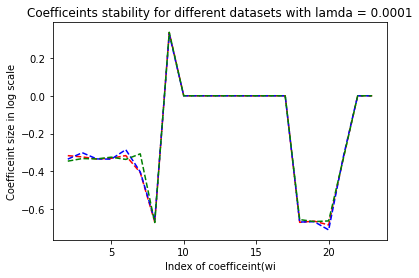

Ridge regression with lambda=1e-10
The shape of wA is:(23,)
The coeficients of wA are:
[ 1.36519532e+03 -3.61851936e+01 -9.33229246e+02 -1.25487176e+01
 -1.17995976e+02 -1.85504446e+01 -9.31866146e+02  4.14964544e+01
  2.02855461e-01 -2.01893084e+00 -3.56387100e-01 -4.50077877e-01
 -2.15062962e-01 -7.57911810e-07 -2.34093865e-04  6.46661025e-05
  1.05454443e-05 -5.92022214e-01 -6.58319664e-01 -6.86308268e-01
 -5.33712769e-02  3.26569557e-02  2.88035164e-01]

The shape of wB is:(23,)
The coeficients of wB are:
[-1.27662505e+03  4.06845017e+02  5.73737463e+02  1.51685481e+01
  1.50231528e+02  5.15611859e+01 -3.75730385e+03  3.80451963e+02
  2.95586240e-01 -1.25387079e+00  8.42094564e-01 -1.06320200e+00
 -5.31275530e-01 -3.33392076e-05  1.02205495e-04  1.63522430e-05
 -3.48143631e-05 -6.04124743e-01  7.29888811e-01 -7.23729531e-01
 -4.24876974e-01 -4.26690979e-01  5.92568399e-01]

The shape of wC is:(23,)
The coeficients of wC are:
[-3.08727078e+03  8.87612777e+02  7.20951369e+02  5.16602

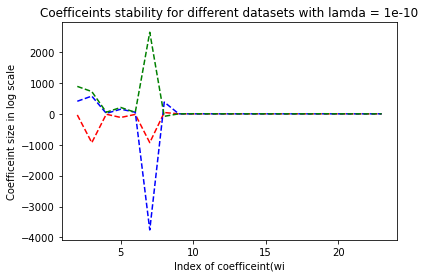

In [100]:
# lamda1
print(f"Ridge regression with lambda={str(args.ridgeLamda)}")
ridgeA = RidgeRegression(subsets[0][0], subsets[0][1], args.ridgeLamda,"wA")
ridgeB = RidgeRegression(subsets[1][0], subsets[1][1], args.ridgeLamda,"wB")
ridgeC = RidgeRegression(subsets[2][0], subsets[2][1], args.ridgeLamda,"wC")
plotFigrueOfRegressionCoefficients(ridgeA.w, ridgeB.w, ridgeC.w, titleAddition="with lamda = "+str(args.ridgeLamda))
#lamda2
print(f"Ridge regression with lambda={str(args.ridgeLamda2)}")
ridgeA = RidgeRegression(subsets[0][0], subsets[0][1], args.ridgeLamda2,"wA")
ridgeB = RidgeRegression(subsets[1][0], subsets[1][1], args.ridgeLamda2,"wB")
ridgeC = RidgeRegression(subsets[2][0], subsets[2][1], args.ridgeLamda2,"wC")
plotFigrueOfRegressionCoefficients(ridgeA.w, ridgeB.w, ridgeC.w, titleAddition="with lamda = "+str(args.ridgeLamda2))
#lamda3
print(f"Ridge regression with lambda={str(args.ridgeLamda3)}")
ridgeA = RidgeRegression(subsets[0][0], subsets[0][1], args.ridgeLamda3,"wA")
ridgeB = RidgeRegression(subsets[1][0], subsets[1][1], args.ridgeLamda3,"wB")
ridgeC = RidgeRegression(subsets[2][0], subsets[2][1], args.ridgeLamda3,"wC")
plotFigrueOfRegressionCoefficients(ridgeA.w, ridgeB.w, ridgeC.w, titleAddition="with lamda = "+str(args.ridgeLamda3))

## Ridge Regression Insights:
### Using the ridge regression we calculate w by: w= (X.T*X + Lambda*I)^-1 * X.T*y for each of our 3 subset.  Each time we do this for different lambda. 
### lambda=0.1
#### We can see that for lambda=0.1 the maximum values for the coeficients of Wx's are in much smaller scale --> the maximum value equals to 6. The regularization term caused the coeficient to shrink

### lambda=0.0001
#### We can see that for lambda=0.0001 the maximum values for the coeficients of Wx's are in much smaller scale --> the maximum value equals to -0.7.  The regularization term caused the coeficient to shrink even more with this lambda..

### lambda=1e-10
#### We can see that for lambda=1e-10 the maximum values for the coeficients of Wx's are again with large scale --> the axis have again large values of 6*10^3 .

#### From those 3 options, for the ridge regression we would like to choose lambda=0.0001 which gave us the best shrinkage for the subsets coeficients.

# Lasso Regression

In [106]:
class LassoRegression(Regression):
    def __init__(self, X: np.array, y: np.array, lamda: float, Wx=""):
        self.lamda = lamda
        self.Wx=Wx
        super(LassoRegression, self).__init__(X, y, Wx)

    def calculateCoefficients(self, Wx=""):
        self.clf = linear_model.Lasso(alpha=self.lamda)
        self.clf.fit(self.X, self.y)
        self.w = self.clf.coef_

    def predict(self, X):
        return self.clf.predict(X)

    def calculateMSE(self, yTrue, yPredict):
        return mean_squared_error(yTrue, yPredict)


def plotMSEbyLamda(lamdas: list, mse: list):
    plt.plot(lamdas, mse, color='red', linestyle='--')
    plt.xscale("log")
    plt.xlabel("lamda(log scale)")
    plt.ylabel("MSE")
    plt.title("MSE by lamda for Lasso Regression")
    plt.show()


for lamda 1e-08 - numer of parameters!=0 : 22
for lamda 1e-05 - numer of parameters!=0 : 22
for lamda 0.0001 - numer of parameters!=0 : 20
for lamda 0.001 - numer of parameters!=0 : 19
for lamda 0.01 - numer of parameters!=0 : 17
for lamda 0.1 - numer of parameters!=0 : 14
for lamda 1 - numer of parameters!=0 : 11
for lamda 5 - numer of parameters!=0 : 8
for lamda 10 - numer of parameters!=0 : 5
for lamda 100 - numer of parameters!=0 : 1


C:\Users\rskolozu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.32024716708667283, tolerance: 0.057322110857142825
  model = cd_fast.enet_coordinate_descent(
C:\Users\rskolozu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.305530550195376, tolerance: 0.057322110857142825
  model = cd_fast.enet_coordinate_descent(
C:\Users\rskolozu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.284163320203383, tolerance: 0.057322110857142825
  model = cd_fast.enet_coordinate_descent(


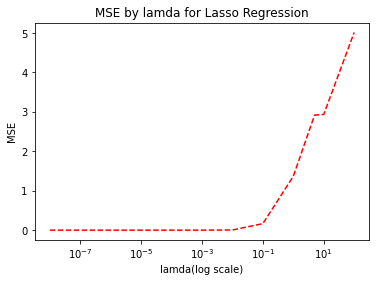

The reccomended lambda (knee location) is:
 (0.1, array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -5.75885163e-01,
        8.02780584e-05, -3.21023965e-03,  8.22837798e-04,  3.22100188e-03,
       -4.43471313e-04,  1.66582294e-03,  7.90491512e-03, -1.82519157e-03,
       -5.36544174e-04, -6.40459873e-02, -9.81319707e-01, -9.84310507e-01,
       -3.58786979e-04, -0.00000000e+00,  0.00000000e+00]), 0.16499089258776556)


In [109]:
#best_lamda is lamda2

# Lasso
lamdasForLasso = args.lassoLamdas
lassoResults = []
mseList = []
for lamda in lamdasForLasso:
    lassoReg = LassoRegression(dataset.X_train, dataset.y_train, lamda)
    yPredict = lassoReg.predict(dataset.X_test)
    mse = lassoReg.calculateMSE(dataset.y_test, yPredict)
    mseList.append(mse)
    lassoResults.append((lamda, lassoReg.w, mse))
    total = 0
    for elem in lassoReg.w:
        if(elem != 0):
            total += 1
    print(f"for lamda {lamda} - numer of parameters!=0 : {total}")
plotMSEbyLamda(lamdasForLasso, mseList)
print(f"The reccomended lambda (knee location) is:\n {lassoResults[5]}")

## Lasso regression Insights:
### We can see that as our lambda increases the number of non zero coeficients decrease in a way that many features are actually dropped and we are left with less parameters. As we can see in the graph above of regression's MSE Vs. alpha, the MSE values are low and pretty stable untill lamda gets to lambda=0.1 there we get MSE=0.165 and from that point it rises exponentially in a way that our next data point for lambda get a value of MSE=1.36 --> More that X10 higher and by using lambda=1 instead lamda=0.1 we gain only in a drop of 3 parameters, thoose we would pick our pull point for alpha as 0.1, in that point we'll have 14 non-zero values.

# Question #2

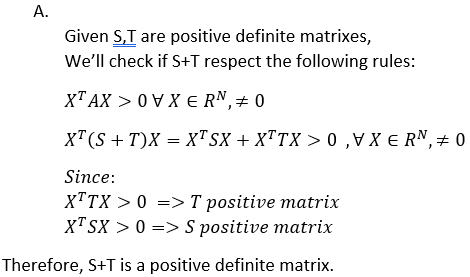

In [103]:
#Answer for Question 2A
Image("Q2A.png")

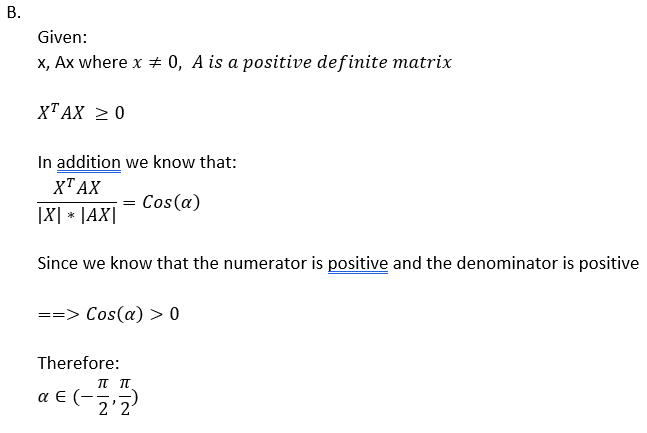

In [105]:
#Answer for Question 2B
Image("Q2B.png")